**Cell 1: Checking Python and Dependency Versions, Importing Dependencies:**


This first cell is responsible for verifying that all required packages and Python version dependencies are installed.

In [4]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)


[ OK ] Python version is 3.12.5

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


**Cell 2: Loading and Inspecting the Dataset:**


This cell will load the dataset and display the first few rows for inspection.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset, using a comma as a delimiter, skipping the first row, and setting 'No' as the index
file_path = '/Users/selinertekin/Desktop/DATA1030-Fall2024/Semester Project/PRSA_data_2010.1.1-2014.12.31.csv'
df = pd.read_csv(file_path, delimiter=',', header=1, index_col=0)  # Ensures delimiter, skips header row, and sets index

# Display basic information about the dataset
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 43824 entries, 1 to 43824
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.3+ MB


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


**Cell 3: Handling Missing Values:**


This cell focuses on handling missing values in the dataset, particularly for the pm2.5 column.

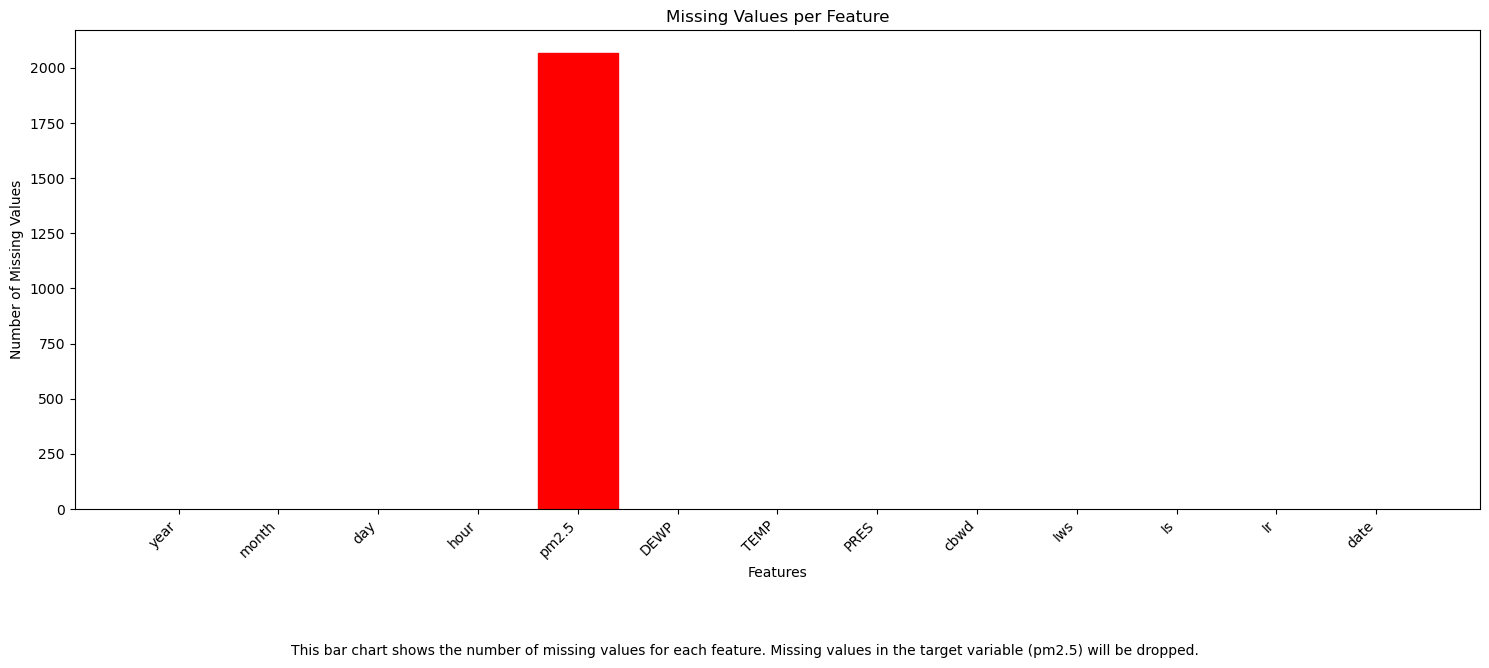


Features with missing values (%):
pm2.5: 4.72%

Summary statistics:
               year         month           day          hour         pm2.5  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean    2012.042771      6.513758     15.685514     11.502311     98.613215   
min     2010.000000      1.000000      1.000000      0.000000      0.000000   
25%     2011.000000      4.000000      8.000000      5.000000     29.000000   
50%     2012.000000      7.000000     16.000000     12.000000     72.000000   
75%     2013.000000     10.000000     23.000000     18.000000    137.000000   
max     2014.000000     12.000000     31.000000     23.000000    994.000000   
std        1.415311      3.454199      8.785539      6.924848     92.050387   

               DEWP          TEMP          PRES           Iws            Is  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean       1.750174     12.401561   1016.442896     23.866747

In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Check missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

# Plot missing values for all features
plt.figure(figsize=(15, 6))
bars = plt.bar(range(len(missing_values)), missing_values)
plt.title('Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')
plt.tight_layout()

# Highlight the pm2.5 bar
pm25_idx = df.columns.get_loc('pm2.5')
bars[pm25_idx].set_color('red')

plt.figtext(0.5, -0.1, 
            'This bar chart shows the number of missing values for each feature. Missing values in the target variable (pm2.5) will be dropped.',
            wrap=True, horizontalalignment='center', fontsize=10)

plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

# Print percentages for features with missing values
print("\nFeatures with missing values (%):")
for col, percent in missing_percentages.items():
    if percent > 0:
        print(f"{col}: {percent:.2f}%")

# Drop rows with missing values in the target variable (pm2.5)
df_cleaned = df.dropna(subset=['pm2.5']).copy()  # Ensure we work on a copy

# Create datetime index
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day', 'hour']])
df_cleaned = df_cleaned.sort_values('date')


# Display summary statistics for the cleaned dataset
print("\nSummary statistics:")
print(df_cleaned.describe())


**Cell 4: Splitting and Sorting the Data**

In [75]:
# Split dataset
train_split_index = int(0.8 * len(df_cleaned))
val_split_index = int(0.9 * len(df_cleaned))

train_df = df_cleaned.iloc[:train_split_index]
val_df = df_cleaned.iloc[train_split_index:val_split_index]
test_df = df_cleaned.iloc[val_split_index:]

X_train = train_df.drop(columns=['pm2.5', 'date'])
y_train = train_df['pm2.5']
X_val = val_df.drop(columns=['pm2.5', 'date'])
y_val = val_df['pm2.5']
X_test = test_df.drop(columns=['pm2.5', 'date'])
y_test = test_df['pm2.5']



**Cell 5: Exploratory Data Analysis (EDA):**


In this cell, you can perform some basic EDA and generate visualizations, which will help you decide what insights to present in your slides.
Histogram

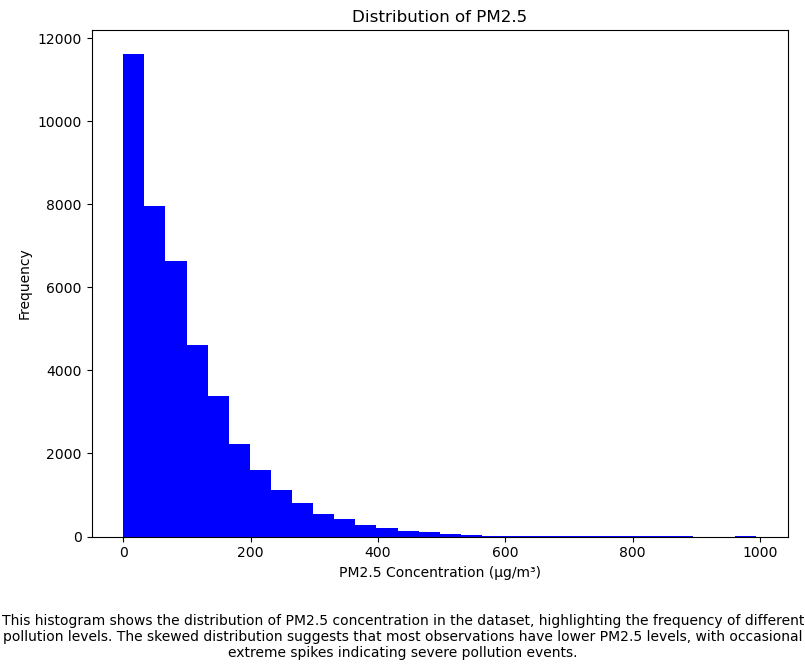

<Figure size 640x480 with 0 Axes>

In [76]:
# EDA: Distribution of PM2.5 values
plt.figure(figsize=(8, 6))

# Ensure there are no NaN values before plotting
if df_cleaned['pm2.5'].notna().sum() > 0:
    plt.hist(df_cleaned['pm2.5'].dropna(), bins=30, color='blue')
    plt.title('Distribution of PM2.5')
    plt.xlabel('PM2.5 Concentration (µg/m³)')
    plt.ylabel('Frequency')
    plt.tight_layout()

    # Adding a text annotation as a caption below the plot
    plt.figtext(0.5, -0.1, 
                'This histogram shows the distribution of PM2.5 concentration in the dataset, highlighting the frequency of different pollution levels. The skewed distribution suggests that most observations have lower PM2.5 levels, with occasional extreme spikes indicating severe pollution events.',
                wrap=True, horizontalalignment='center', fontsize=10)

    
    plt.show()

    # Save the figure with the added caption
    plt.savefig('pm25_distribution.png', dpi=300, bbox_inches='tight')
else:
    print("No valid PM2.5 data to plot.")




**Cell 6: Encoding Categorical Variables:**


In [77]:
from sklearn.preprocessing import OneHotEncoder

# Use one-hot encoding for the 'cbwd' column
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform on the training set
X_train_ohe = ohe.fit_transform(X_train[['cbwd']])

# Transform on the validation and test sets
X_val_ohe = ohe.transform(X_val[['cbwd']])
X_test_ohe = ohe.transform(X_test[['cbwd']])

# Convert to DataFrame and add back to the original X DataFrames
X_train = pd.concat([X_train.reset_index(drop=True), 
                     pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(['cbwd']))], axis=1)
X_val = pd.concat([X_val.reset_index(drop=True), 
                   pd.DataFrame(X_val_ohe, columns=ohe.get_feature_names_out(['cbwd']))], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), 
                    pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(['cbwd']))], axis=1)

# Drop the original 'cbwd' column
X_train = X_train.drop(columns=['cbwd'])
X_val = X_val.drop(columns=['cbwd'])
X_test = X_test.drop(columns=['cbwd'])


**Cell 7: Scaling the Data**

In [78]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform train, validation, and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Checking the shape of the data after scaling
print("Number of features after scaling:", X_train_scaled.shape[1])

# Display summary statistics after scaling
summary_stats = X_train_scaled.describe()
print("Summary Statistics After Scaling:")
print(summary_stats)



Number of features after scaling: 13
Summary Statistics After Scaling:
               year         month           day          hour          DEWP  \
count  3.340500e+04  3.340500e+04  3.340500e+04  3.340500e+04  3.340500e+04   
mean  -1.640385e-15  7.997727e-17  5.955754e-17 -8.327420e-17 -8.508220e-17   
std    1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.358979e+00 -1.569681e+00 -1.661846e+00 -1.660961e+00 -2.507955e+00   
25%   -4.841489e-01 -9.952158e-01 -8.647091e-01 -9.389479e-01 -8.589028e-01   
50%    3.906817e-01 -1.335175e-01 -6.757261e-02  7.187063e-02 -3.437685e-02   
75%    1.265512e+00  1.015414e+00  8.434406e-01  9.382865e-01  9.275701e-01   
max    2.140343e+00  1.589879e+00  1.754454e+00  1.660300e+00  1.820807e+00   

               TEMP          PRES           Iws            Is            Ir  \
count  3.340500e+04  3.340500e+04  3.340500e+04  3.340500e+04  3.340500e+04   
mean   3.403288e-18 -4.750990e-15  3.658535e-17 -1.127339e-

**Cell 8: XGBoost Implementation with Missing Values**

In [79]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Reset indices and clean NaN values in all datasets
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Remove NaN values
train_mask = ~y_train.isna()
val_mask = ~y_val.isna()
test_mask = ~y_test.isna()

X_train_clean = X_train[train_mask]
y_train_clean = y_train[train_mask]
X_val_clean = X_val[val_mask]
y_val_clean = y_val[val_mask]
X_test_clean = X_test[test_mask]
y_test_clean = y_test[test_mask]

**Cell 9: Correlation Heatmap:**


Relationship between different numerical variables

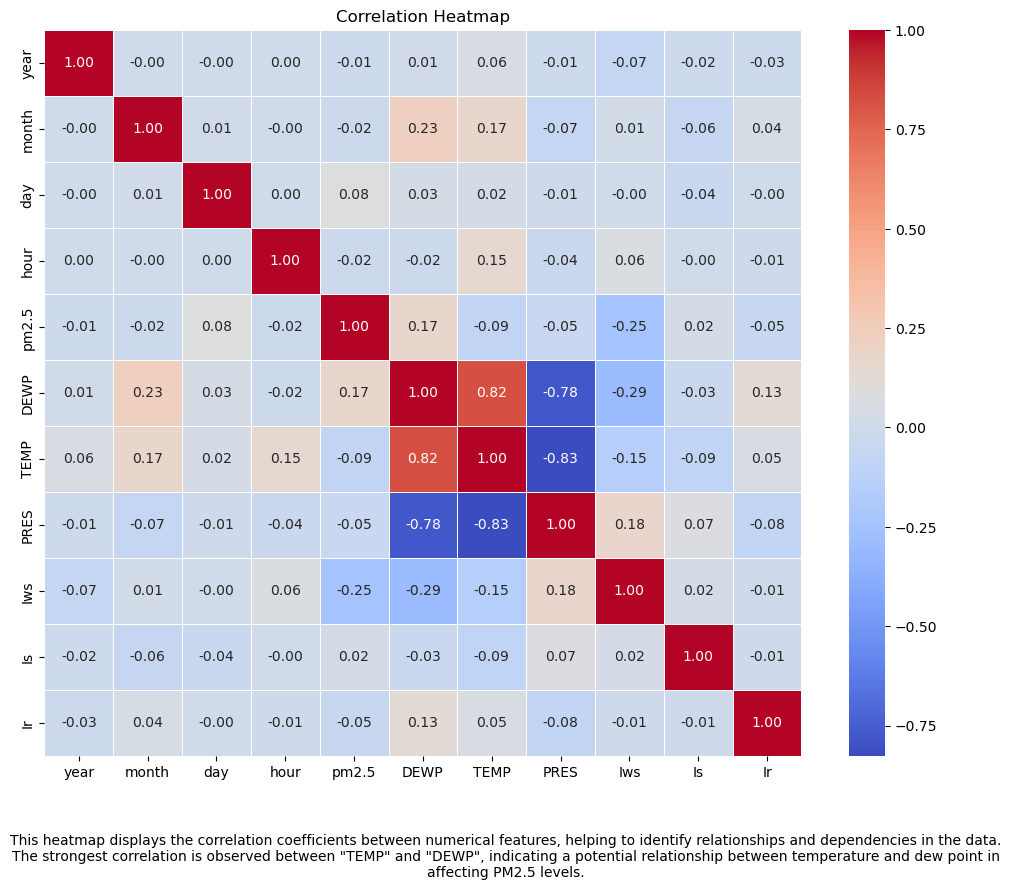

In [68]:
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Create a correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()

# Adding a text annotation as a caption below the plot
plt.figtext(0.5, -0.1, 
            'This heatmap displays the correlation coefficients between numerical features, helping to identify relationships and dependencies in the data. The strongest correlation is observed between "TEMP" and "DEWP", indicating a potential relationship between temperature and dew point in affecting PM2.5 levels.',
            wrap=True, horizontalalignment='center', fontsize=10)
# Save the figure with the added caption
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

**Cell 10: Time Series of PM2.5 Concentration:**


Plotting the PM2.5 concentration over time can help show trends or seasonality in pollution levels.

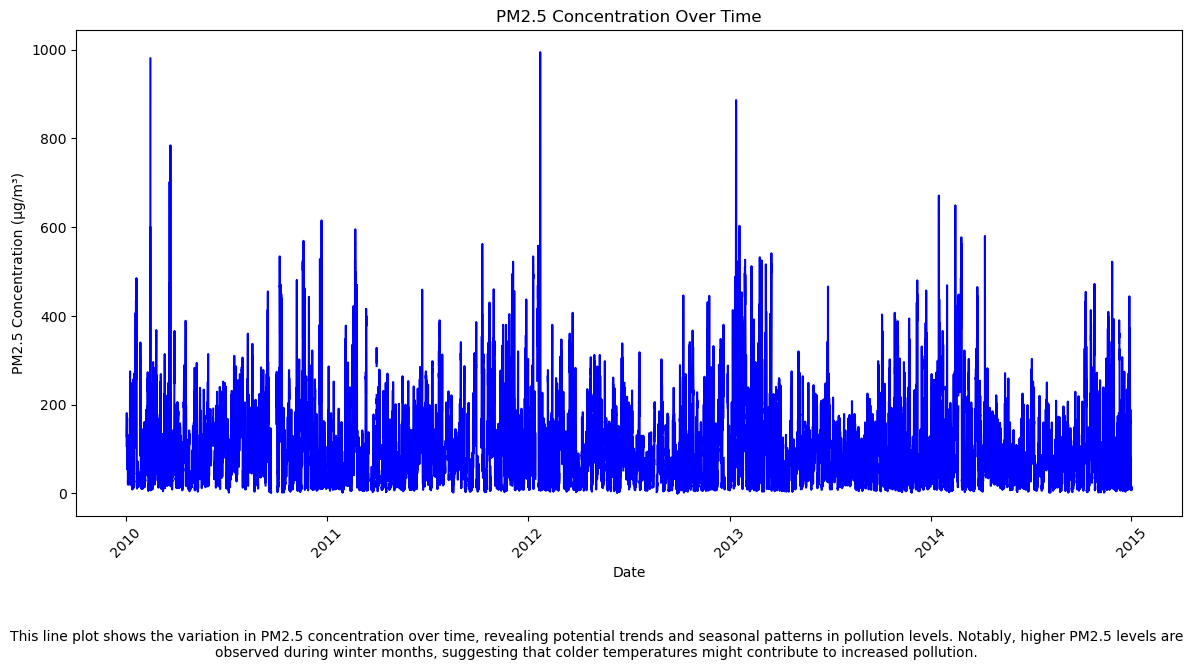

In [69]:
# Avoid the SettingWithCopyWarning by using .loc[]
df_cleaned_copy.loc[:, 'date'] = pd.to_datetime(df_cleaned_copy[['year', 'month', 'day', 'hour']])

# Avoid the SettingWithCopyWarning by using .loc[]
df_cleaned_copy.loc[:, 'date'] = pd.to_datetime(df_cleaned_copy[['year', 'month', 'day', 'hour']])

# Plot PM2.5 over time using df_cleaned_copy
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned_copy['date'], df_cleaned_copy['pm2.5'], color='blue')
plt.title('PM2.5 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding a text annotation as a caption below the plot
plt.figtext(0.5, -0.1, 
            'This line plot shows the variation in PM2.5 concentration over time, revealing potential trends and seasonal patterns in pollution levels. Notably, higher PM2.5 levels are observed during winter months, suggesting that colder temperatures might contribute to increased pollution.',
            wrap=True, horizontalalignment='center', fontsize=10)
# Save the figure with the added caption
plt.savefig('pm25_time_series.png', dpi=300, bbox_inches='tight')
plt.show()

**Cell 11: Box Plot for Categorical Features:**


This visualization will help you show how PM2.5 concentrations vary by wind direction (cbwd).

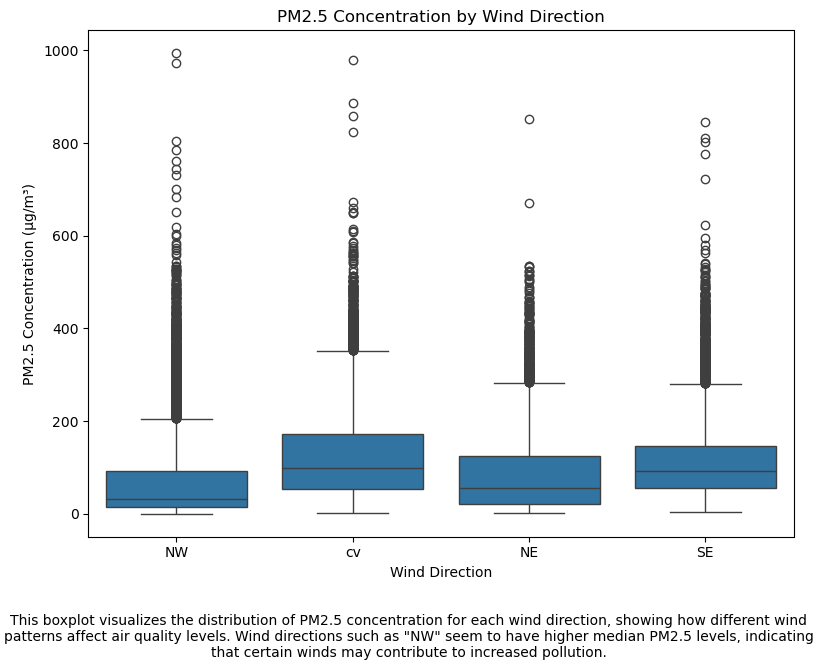

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for PM2.5 concentrations by wind direction
plt.figure(figsize=(8, 6))
sns.boxplot(x='cbwd', y='pm2.5', data=df_cleaned_copy)
plt.title('PM2.5 Concentration by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.tight_layout()

# Adding a text annotation as a caption below the plot
plt.figtext(0.5, -0.1, 
            'This boxplot visualizes the distribution of PM2.5 concentration for each wind direction, showing how different wind patterns affect air quality levels. Wind directions such as "NW" seem to have higher median PM2.5 levels, indicating that certain winds may contribute to increased pollution.',
            wrap=True, horizontalalignment='center', fontsize=10)

# Save the figure with the added caption
plt.savefig('pm25_wind_direction_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()


**Cell 12: Histogram of Temperature (TEMP):**

This histogram shows the distribution of temperatures, which may affect air quality.

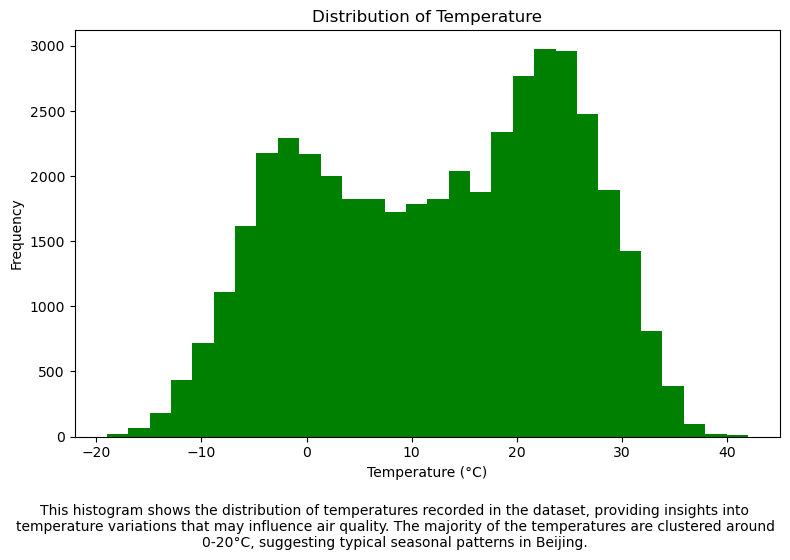

In [86]:
# Histogram of Temperature (TEMP)
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned_copy['TEMP'], bins=30, color='green')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.tight_layout()

# Adding a text annotation as a caption below the plot
plt.figtext(0.5, -0.1, 
            'This histogram shows the distribution of temperatures recorded in the dataset, providing insights into temperature variations that may influence air quality. The majority of the temperatures are clustered around 0-20°C, suggesting typical seasonal patterns in Beijing.',
            wrap=True, horizontalalignment='center', fontsize=10)


# Save the figure with the added caption
plt.savefig('temperature_distribution.png', dpi=300, bbox_inches='tight')
plt.show()